In [1]:
%run __init__.py
%matplotlib inline

Using TensorFlow backend.


In [2]:
mndata = MNIST('./python-mnist/data')
X_train,y_train=mndata.load_training()
X_test, y_test=mndata.load_testing()
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test= np.array(X_test)
y_test=np.array(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [3]:
image = np.array(X_train[0]).reshape((28,28))

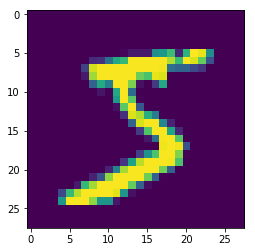

In [5]:
plt.imshow(image)
plt.show()

### Preprocessing

In [6]:
SS=StandardScaler()

In [7]:
X_train_ss= SS.fit_transform(X_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


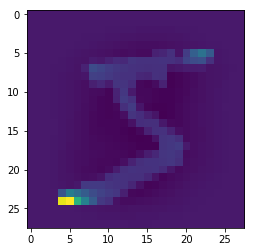

In [8]:
image = np.array(X_train_ss[0]).reshape((28,28))
plt.imshow(image)
plt.show()

values 0 to 1

In [9]:
X_train_01=X_train/255

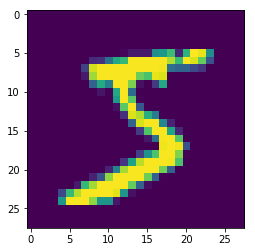

In [10]:
image = np.array(X_train_01[0]).reshape((28,28))
plt.imshow(image)
plt.show()

deskew

In [11]:
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

In [12]:
def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

In [13]:
def deskewAll(X):
    currents = []
    for i in range(len(X)):
        currents.append(deskew(X[i].reshape(28,28)).flatten())
    return np.array(currents)

X_train_deskewed = deskewAll(X_train)
X_test_deskewed = deskewAll(X_test)

In [35]:
image = X_train[5].reshape((28,28))

In [36]:
image_deskewed = X_train_deskewed[5].reshape((28,28))

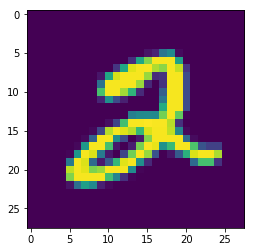

In [37]:
plt.imshow(image)
plt.show()

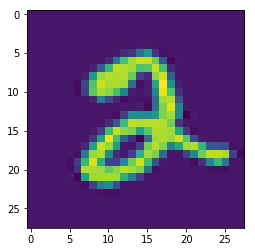

In [38]:
plt.imshow(image_deskewed)
plt.show()

### PCA

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


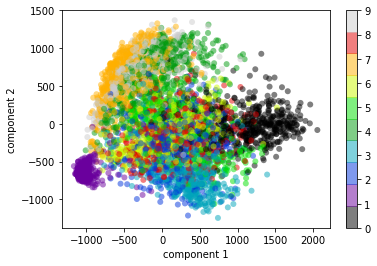

In [32]:
from sklearn.decomposition import PCA
pca = PCA(2)
PCA_fit = pca.fit(X_train_deskewed[:5000])
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train[:5000], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.show()

In [33]:
sum(PCA_fit.explained_variance_ratio_)

0.2359262815206831

In [21]:
pca = PCA(10)

In [22]:
PCA_fit = pca.fit(X_train_deskewed[:5000])

In [23]:
PCA_fit.explained_variance_ratio_

array([ 0.13780065,  0.09812563,  0.07202991,  0.06141833,  0.04919217,
        0.04462715,  0.03529004,  0.02843297,  0.02562182,  0.02368987])

In [26]:
pca=PCA(40)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.83200489147342394

In [27]:
pca=PCA(100)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.93957428479079685

In [28]:
pca=PCA(200)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.97998551550274671

In [30]:
pca=PCA(300)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.99302610283331971

In [34]:
pca=PCA(400)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.99844612544805644